## Introduction

[The Academy Awards](https://en.wikipedia.org/wiki/Academy_Awards), also known as the [Oscars](https://en.wikipedia.org/wiki/Academy_Awards), have been awarded since 1920s. During this 91 year period, spanning from President Hoover to President Trump, the United States has seen significant cultural shifts in gender, race, and LGBTQ acceptance. The purpose of this project is to explore the demographics of Oscar recipients and discuss the representation of minorities in the Academy Awards. We will accomplish this by cleaning, analyzing, and preparing the data to gather insights. <br>

### Goals 
We ask: Are the Oscars diverse in representation? Have the Oscars increased in diversity?
- Import and Explore the Data
- Exploratory Data Analysis: Visualize Interesting Features 
- Clean, Create and Merge to Form New Dataset for Tableau
- Export New Dataset to create a Tableau Dashboard
 

In [1]:
# Import useful libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import the dataset for our analysis
oscars = pd.read_csv('./Oscars-demographics-DFE.csv',encoding='latin')

# print the column names
print(oscars.columns)

# print first few rows
oscars.head()

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold'],
      dtype='object')


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


Here, we find some interesting features in the dataset. Columns like race_ethnicity, sexual_orientation, and religion appear to be sound indicators of demographic spread in the Oscars. We will begin by visualizing and exploring these columns.

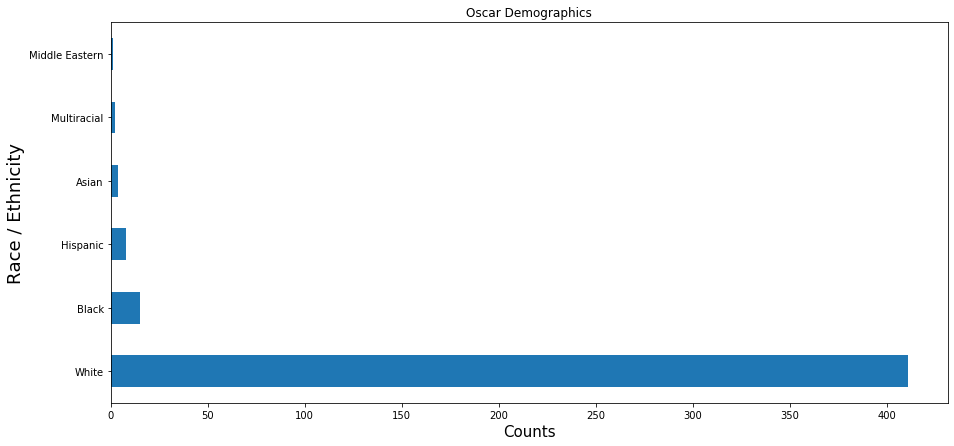

In [3]:
# Plotting the race/ethnicity

oscars['race_ethnicity'].value_counts().plot(kind='barh', figsize=(15,7))
plt.ylabel('Race / Ethnicity',fontsize=18)
plt.xlabel('Counts',fontsize=15)
plt.title('Oscar Demographics')
plt.show()


The overwhelming majority of Oscar winners identify as White, with Black and Hispanic being the next most representated groups repsectively. 

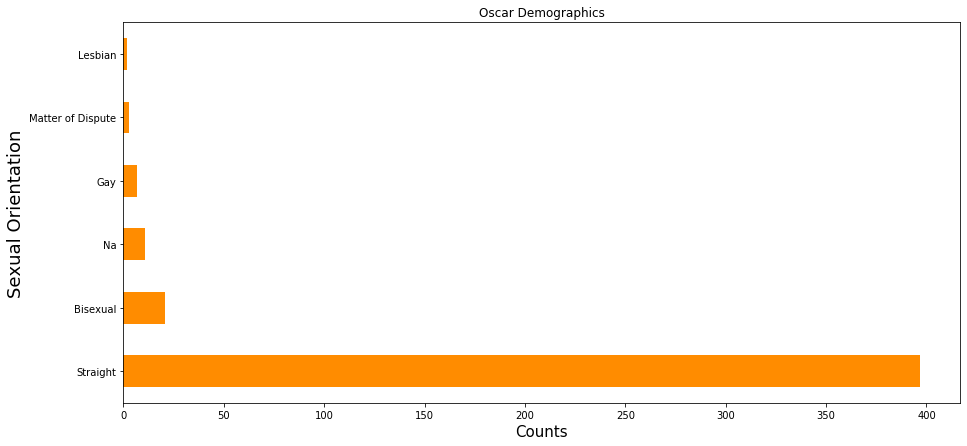

In [4]:
# Plotting sexual orientation
oscars['sexual_orientation'].value_counts(dropna=True).plot(kind='barh', figsize=(15,7), color='darkorange')
plt.ylabel('Sexual Orientation',fontsize=18)
plt.xlabel('Counts',fontsize=15)
plt.title('Oscar Demographics')
plt.show()

Straight is by far the most representated, followed by Bisexual.

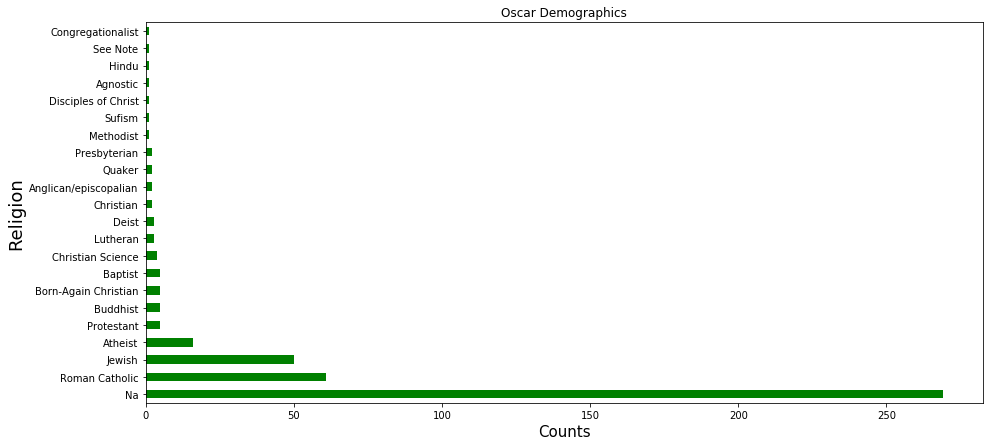

In [5]:
# Plotting religion
oscars['religion'].value_counts(dropna=True).plot(kind='barh', figsize=(15,7), color='green')
plt.ylabel('Religion',fontsize=18)
plt.xlabel('Counts',fontsize=15)
plt.title('Oscar Demographics')
plt.show()

The religion category had the most amount of unknowns, however, Abrahamic religions such as Christianity and Judaism, appear to be the most represented. Due to the large amount of unknowns, it is best to not track this metric when we do a historical analysis.

## Creating a dataset for historical trend analysis

Our initial exploration has revealed that a majority of Oscar winners were White and Straight. Given the long history of the Oscars, and the gradual social shift in America, we aim to discover how this representation has changed.

In [6]:
print("The earliest award is given on ", oscars['year_of_award'].min())
print("The most recent award is given on ", oscars['year_of_award'].max())
oscars['year_of_award'].describe()

The earliest award is given on  1927
The most recent award is given on  2014


count     441.000000
mean     1973.165533
std        24.030895
min      1927.000000
25%      1953.000000
50%      1973.000000
75%      1994.000000
max      2014.000000
Name: year_of_award, dtype: float64

Here we find that the earliest entry in our dataset is from 1927, and the most recent entry is from 2014. To do our historical analysis, we will look at the race_ethnicity column and the sexual_orientation column, and break it down by the decade of wins.

In [7]:
#make a new dataframe for Race trends throughout decades
new_race_df = pd.DataFrame(oscars['race_ethnicity'].value_counts())
new_race_df = new_race_df.T
new_race_df.rename(index={'race_ethnicity': 'All Decades'}, inplace=True)

#add in decades
for i in range(1930, 2030,10):
    mask = ((i - 10) <= oscars['year_of_award']) & (oscars['year_of_award'] < i)
    mask_on = oscars[mask]
    new_add = mask_on['race_ethnicity'].value_counts()
    new_race_df = new_race_df.append(new_add.T)
    new_race_df.rename(index={'race_ethnicity': '{}s'.format((i-10))}, inplace=True)
new_race_df

,White,Black,Hispanic,Asian,Multiracial,Middle Eastern
All Decades,411.0,15.0,8.0,4.0,2.0,1.0
1920s,3.0,NaN,NaN,NaN,NaN,NaN
1930s,36.0,NaN,NaN,NaN,NaN,NaN
1940s,54.0,1.0,NaN,NaN,NaN,NaN
1950s,48.0,NaN,3.0,1.0,NaN,NaN
1960s,54.0,1.0,1.0,NaN,NaN,NaN
1970s,54.0,NaN,NaN,NaN,NaN,NaN
1980s,45.0,1.0,NaN,1.0,1.0,1.0
1990s,50.0,3.0,1.0,NaN,NaN,NaN
2000s,48.0,5.0,3.0,1.0,1.0,NaN


In [8]:
#make a new dataframe for sexual orientation trends throughout decades
new_orientation_df = pd.DataFrame(oscars['sexual_orientation'].value_counts())
new_orientation_df = new_orientation_df.T
new_orientation_df.rename(index={'sexual_orientation': 'All Decades'}, inplace=True)

#add in decades
for i in range(1930, 2030,10):
    mask = ((i - 10) <= oscars['year_of_award']) & (oscars['year_of_award'] < i)
    mask_on = oscars[mask]
    new_add = mask_on['sexual_orientation'].value_counts()
    new_orientation_df = new_orientation_df.append(new_add.T)
    new_orientation_df.rename(index={'sexual_orientation': '{}s'.format((i-10))}, inplace=True)
new_orientation_df

,Straight,Bisexual,Na,Gay,Matter of Dispute,Lesbian
All Decades,397.0,21.0,11.0,7.0,3.0,2.0
1920s,2.0,1.0,NaN,NaN,NaN,NaN
1930s,33.0,2.0,NaN,1.0,NaN,NaN
1940s,48.0,4.0,2.0,NaN,1.0,NaN
1950s,48.0,4.0,NaN,NaN,NaN,NaN
1960s,45.0,4.0,3.0,4.0,NaN,NaN
1970s,51.0,1.0,1.0,1.0,NaN,NaN
1980s,44.0,2.0,1.0,1.0,NaN,1.0
1990s,51.0,1.0,NaN,NaN,1.0,1.0
2000s,55.0,2.0,NaN,NaN,1.0,NaN


In [9]:
#join the dataframes together
frames = [new_race_df, new_orientation_df]
trends_df = pd.concat(frames,axis=1)

#Fill in NaN values with zero
trends_df = trends_df.fillna(0)
trends_df.head(15)

,White,Black,Hispanic,Asian,Multiracial,Middle Eastern,Straight,Bisexual,Na,Gay,Matter of Dispute,Lesbian
All Decades,411.0,15.0,8.0,4.0,2.0,1.0,397.0,21.0,11.0,7.0,3.0,2.0
1920s,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
1930s,36.0,0.0,0.0,0.0,0.0,0.0,33.0,2.0,0.0,1.0,0.0,0.0
1940s,54.0,1.0,0.0,0.0,0.0,0.0,48.0,4.0,2.0,0.0,1.0,0.0
1950s,48.0,0.0,3.0,1.0,0.0,0.0,48.0,4.0,0.0,0.0,0.0,0.0
1960s,54.0,1.0,1.0,0.0,0.0,0.0,45.0,4.0,3.0,4.0,0.0,0.0
1970s,54.0,0.0,0.0,0.0,0.0,0.0,51.0,1.0,1.0,1.0,0.0,0.0
1980s,45.0,1.0,0.0,1.0,1.0,1.0,44.0,2.0,1.0,1.0,0.0,1.0
1990s,50.0,3.0,1.0,0.0,0.0,0.0,51.0,1.0,0.0,0.0,1.0,1.0
2000s,48.0,5.0,3.0,1.0,1.0,0.0,55.0,2.0,0.0,0.0,1.0,0.0


In [10]:
# Export to a CSV for Tableau visualization
trends_df.to_csv('trends.csv')

We have created two datasets, one for race_ethnicity and one for sexual_orientation, and merged them. We have exported these into a CSV, which will be used to create a dashboard in Tableau.